# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [34]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [35]:
import numpy as np

def max_element(arr):
    mask = arr[:-1] == 0  #логический массив из тру и фолз
    if not np.any(mask):
        return None
    return arr[1:][mask].max()

# Загружаем только числовые данные (текстовые заменяются на NaN)
data = np.genfromtxt('2008.csv', delimiter=',', skip_header=1, dtype=float, filling_values=np.nan)

# Пример: возьмём столбец ArrDelay (индекс 14)
arr_delay = data[:, 14]

# Убираем NaN
arr_delay = arr_delay[~np.isnan(arr_delay)]

result = max_element(arr_delay)

print("Максимальный элемент после нуля в ArrDelay:", result)

Максимальный элемент после нуля в ArrDelay: 326.0


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [36]:
import numpy as np

def nearest_value(X, v):
    # Находим индекс ближайшего элемента в плоском виде
    idx = np.abs(X - v).argmin()
    # Преобразуем индекс в координаты (строка, столбец)
    coords = np.unravel_index(idx, X.shape)
    # Возвр значение по этим координатам
    return X[coords]

X = np.arange(0, 10).reshape((2, 5))
v = 3.6

print(X)

print(nearest_value(X, v))

[[0 1 2 3 4]
 [5 6 7 8 9]]
4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [37]:
def scale(X):

    mean = X.mean(axis=0)              # Среднее по каждому столбцу
    std = X.std(axis=0)                # Стандартное отклонение по каждому столбцу
    std[std == 0] = 1                  # замена 0 на 1
    return (X - mean) / std

X = np.random.randint(0, 10, (4, 3))
print("Исходная матрица:\n", X)

X_scaled = scale(X)
print("\nМасштабированная матрица:\n", X_scaled)

# теперь среднее примерно 0, стандартное отклонение примерно 1
print("\nСредние по столбцам:", X_scaled.mean(axis=0))
print("Ст. отклонение по столбцам:", X_scaled.std(axis=0))

Исходная матрица:
 [[1 3 2]
 [5 4 2]
 [1 2 3]
 [2 4 5]]

Масштабированная матрица:
 [[-0.76249285 -0.30151134 -0.81649658]
 [ 1.67748427  0.90453403 -0.81649658]
 [-0.76249285 -1.50755672  0.        ]
 [-0.15249857  0.90453403  1.63299316]]

Средние по столбцам: [1.38777878e-17 2.77555756e-17 0.00000000e+00]
Ст. отклонение по столбцам: [1. 1. 1.]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [38]:
def get_stats(X):

    det = np.linalg.det(X)           # Определитель
    trace = np.trace(X)              # След
    min_val = X.min()                # Мин элемент
    max_val = X.max()                # Мак элемент
    frob_norm = np.linalg.norm(X, 'fro')  # Норма Фробениуса
    eigenvalues = np.linalg.eigvals(X)    # Собственные числа

    # Проверяем, что определитель не 0
    if np.isclose(det, 0):
        inv_matrix = None
    else:
        inv_matrix = np.linalg.inv(X)     # Обратная матрица

    return det, trace, min_val, max_val, frob_norm, eigenvalues, inv_matrix

X = np.random.normal(10, 1, (3, 3))
print("Матрица:\n", X)

result = get_stats(X)
print("\nОпределитель:", result[0])
print("След:", result[1])
print("Мин элемент:", result[2])
print("Макс элемент:", result[3])
print("Норма Фробениуса:", result[4])
print("Собственные числа:", result[5])
print("Обратная матрица:\n", result[6])

Матрица:
 [[ 9.1668079   8.5474092   9.36181095]
 [10.24061063 10.84015131  9.87937256]
 [ 9.88984807  9.65373864  9.89426599]]

Определитель: -0.14443558724030614
След: 29.901225188210752
Мин элемент: 8.547409201391439
Макс элемент: 10.840151306276194
Норма Фробениуса: 29.21666182156579
Собственные числа: [ 2.91521111e+01 -6.55649433e-03  7.55670574e-01]
Обратная матрица:
 [[-82.26822702 -40.19879106 117.97928452]
 [ 25.04806291  13.07193374 -36.75237088]
 [ 57.79234302  27.42668378 -81.96660753]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [39]:
max_values = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A @ B                    #эквивалент np.dot (A, B)
    max_values.append(C.max())

max_values = np.array(max_values)

mean_val = np.mean(max_values)  # среднее значение
quantile_95 = np.quantile(max_values, 0.95)  # 95% квантиль - значение меньше которого 95 проц знач

print(f"Среднее значение максимальных элементов: {mean_val:.4f}")
print(f"95-процентная квантиль: {quantile_95:.4f}")

Среднее значение максимальных элементов: 8.0698
95-процентная квантиль: 11.2342


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [40]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [41]:
cols = ["Cancelled", "CancellationCode"]

df = pd.read_csv("2008.csv", usecols=cols)

cancelled = df[df["Cancelled"] == 1]

cancel_counts = cancelled["CancellationCode"].value_counts()

most_common_code = cancel_counts.idxmax()
most_common_count = cancel_counts.max()

reasons = {
    "A": "Carrier — вина авиакомпании",
    "B": "Weather — погодные условия",
    "C": "NAS — национальная система воздушного движения (аэропорт, трафик)",
    "D": "Security — причины безопасности"
}

print("Количество отмен по причинам:")
print(cancel_counts)
print("\nСамая частая причина отмены:")
print(f"Код: {most_common_code} → {reasons.get(most_common_code, 'Неизвестно')}")
print(f"Количество отмен: {most_common_count}")

Количество отмен по причинам:
CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

Самая частая причина отмены:
Код: A → Carrier — вина авиакомпании
Количество отмен: 563


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [42]:
df = pd.read_csv("2008.csv", usecols=["Distance"])

df = df.dropna(subset=["Distance"])

mean_distance = df["Distance"].mean()
min_distance = df["Distance"].min()
max_distance = df["Distance"].max()

print(f"Среднее расстояние: {mean_distance:.2f} миль")
print(f"Минимальное расстояние: {min_distance:.2f} миль")
print(f"Максимальное расстояние: {max_distance:.2f} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31.00 миль
Максимальное расстояние: 4962.00 миль


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [43]:
df = pd.read_csv("2008.csv", usecols=["Distance"])
# Удаляем возможные пропуски
df = df.dropna(subset=["Distance"])

# Считаем статистику
mean_distance = df["Distance"].mean()
min_distance = df["Distance"].min()
max_distance = df["Distance"].max()

print(f"Среднее расстояние: {mean_distance:.2f} миль")
print(f"Минимальное расстояние: {min_distance:.2f} миль")
print(f"Максимальное расстояние: {max_distance:.2f} миль")

Среднее расстояние: 724.51 миль
Минимальное расстояние: 31.00 миль
Максимальное расстояние: 4962.00 миль


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [44]:
df = pd.read_csv("2008.csv", usecols=["Origin"])

origin_counts = df["Origin"].value_counts()

most_frequent_origin = origin_counts.idxmax()
num_flights = origin_counts.max()

print(f"Аэропорт с наибольшим числом вылетов: {most_frequent_origin}")
print(f"Количество вылетов: {num_flights}")

Аэропорт с наибольшим числом вылетов: ATL
Количество вылетов: 4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [45]:
df = pd.read_csv("2008.csv", usecols=["Origin", "AirTime"])

# Убираем строки с пропущенными значениями времени полета
df = df.dropna(subset=["AirTime"])

# Считаем среднее время полета для каждого аэропорта
mean_airtime_by_origin = df.groupby("Origin")["AirTime"].mean()

max_origin = mean_airtime_by_origin.idxmax()
max_value = mean_airtime_by_origin.max()

print("Аэропорт с наибольшим средним временем полёта:")
print(f"{max_origin} — среднее время {max_value:.2f} минут")

Аэропорт с наибольшим средним временем полёта:
SJU — среднее время 205.20 минут


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [46]:
df = pd.read_csv("2008.csv", usecols=["Origin", "DepDelay"])

df = df.dropna(subset=["DepDelay"])

# задержан ли рейс
df["Delayed"] = df["DepDelay"] > 0

grouped = df.groupby("Origin")

filtered = grouped.filter(lambda x: len(x) >= 1000)

# доля задержанных
delay_share = filtered.groupby("Origin")["Delayed"].mean()

# находим аэропорт с наибольшей долей задержек
max_origin = delay_share.idxmax()
max_share = delay_share.max()

print(f"Аэропорт с наибольшей долей задержанных рейсов: {max_origin}")
print(f"Доля задержанных рейсов: {max_share:.2%}")

Аэропорт с наибольшей долей задержанных рейсов: EWR
Доля задержанных рейсов: 52.87%


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [47]:
df = pd.read_csv("2008.csv")

# проверяем, есть ли пропуски
has_missing = df.isnull().values.any()
print("Имеются ли пропущенные значения:", has_missing)

total_missing = df.isnull().sum().sum()
print("Всего пропущенных элементов в таблице:", total_missing)

# сколько строк имеют хотя бы один пропуск
rows_with_missing = df.isnull().any(axis=1).sum()
print("Количество объектов с хотя бы одним пропуском:", rows_with_missing)

# сколько столбцов имеют хотя бы одно пропущенное значение
cols_with_missing = df.isnull().any(axis=0).sum()
print("Количество признаков с хотя бы одним пропущенным значением:", cols_with_missing)

Имеются ли пропущенные значения: True
Всего пропущенных элементов в таблице: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропущенным значением: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [48]:

df = pd.read_csv("2008.csv")

missing_depdelay = df['DepDelay'].isnull().sum()
print("Пропущенные значения в DepDelay:", missing_depdelay)

print("Пример объектов с пропущенной DepDelay:")
print(df[df['DepDelay'].isnull()].head())

df = df.dropna(subset=['DepDelay'])

df = df[df['DepDelay'] != 0]

df = df.drop(columns=['Cancelled', 'Diverted'], errors='ignore')

y = df['DepDelay']
X = df.drop(columns=['DepDelay'])

print("Размер матрицы признаков X:", X.shape)
print("Размер вектора целевой переменной y:", y.shape)
print("Есть ли пропуски в X:", X.isnull().values.any())

Пропущенные значения в DepDelay: 1399
Пример объектов с пропущенной DepDelay:
     Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11   2008      3           6          4      NaN        1605      NaN   
78   2008      1          19          6      NaN         750      NaN   
103  2008      7          24          4      NaN        1230      NaN   
112  2008      2           4          1      NaN         620      NaN   
128  2008      1          21          1      NaN        1838      NaN   

     CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
11         1940            AA        484  ...    NaN      NaN          1   
78          930            EV       4772  ...    NaN      NaN          1   
103        1355            FL        816  ...    NaN      NaN          1   
112         758            NW       1281  ...    NaN      NaN          1   
128        2005            UA       1251  ...    NaN      NaN          1   

     CancellationCode  Div

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [49]:
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']

for feature in time_features:

    col = df[feature]

    # Создаём колонки для часов и минут
    df[feature + '_Hour'] = col.dropna().astype(int) // 100
    df[feature + '_Minute'] = col.dropna().astype(int) % 100

    # Присваиваем NaN там, где был пропуск
    df.loc[col.isnull(), feature + '_Hour'] = np.nan
    df.loc[col.isnull(), feature + '_Minute'] = np.nan

    df = df.drop(columns=[feature])

print(df.head())

   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0  2008      6          18          3            WN        242  N699SW   
1  2008      6           4          3            XE       2380  N15980   
2  2008      8           3          7            WN       1769  N464WN   
3  2008      1          23          3            OO       3802  N465SW   
4  2008      5           4          7            WN        399  N489WN   

   ActualElapsedTime  CRSElapsedTime  AirTime  ...  SecurityDelay  \
0               57.0            65.0     46.0  ...            NaN   
1              124.0           138.0    108.0  ...            NaN   
2              138.0           155.0    125.0  ...            NaN   
3              102.0           111.0     79.0  ...            NaN   
4              148.0           160.0    136.0  ...            NaN   

   LateAircraftDelay DepTime_Hour DepTime_Minute  CRSDepTime_Hour  \
0                NaN         21.0           11.0             20.0   
1 

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [50]:
features_to_drop = [
    'CRSArrTime_Hour', 'CRSArrTime_Minute',
    'ArrTime_Hour', 'ArrTime_Minute',
    'ActualElapsedTime', 'AirTime', 'CRSElapsedTime',
    'TailNum', 'Year'
]

X.drop(columns=[col for col in features_to_drop if col in X.columns], inplace=True)

print("Оставшиеся признаки после исключения сильно коррелирующих и идентифицирующих:")
print(X.columns)

Оставшиеся признаки после исключения сильно коррелирующих и идентифицирующих:
Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ArrDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

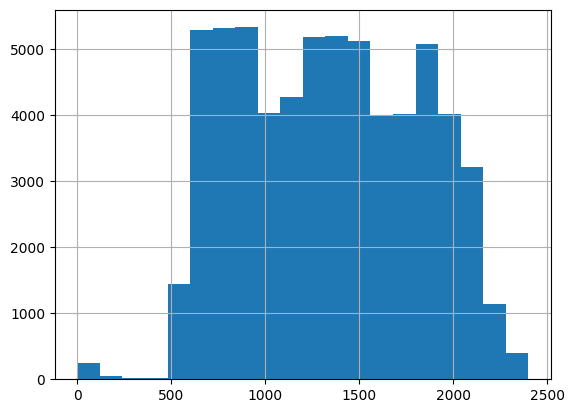

In [51]:
X['DepTime'].hist(bins=20)

<Axes: >

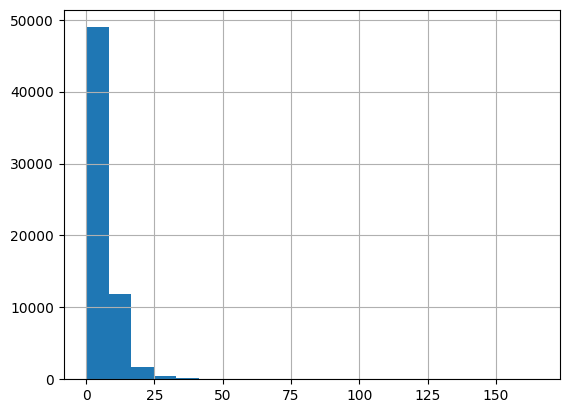

In [52]:
X['TaxiIn'].hist(bins=20)

<Axes: >

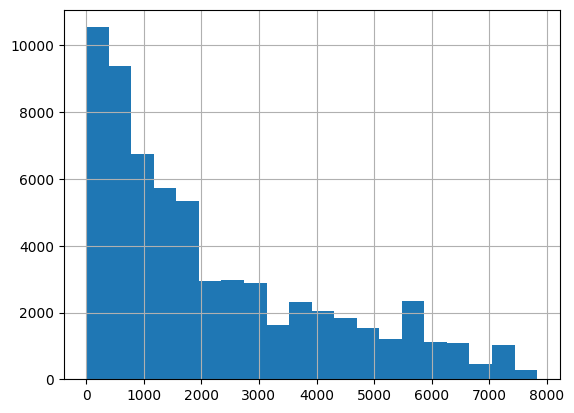

In [53]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [54]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):

    df = data.copy()

    # Определяем вещественные и категориальные признаки
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # заполнение пропусков
    df[numeric_features] = df[numeric_features].fillna(0)
    df[categorical_features] = df[categorical_features].fillna('nan')

    # масштабирование числовых признаков
    scaler = StandardScaler()
    df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]),
                                     columns=numeric_features,
                                     index=df.index)

    # кодирование категориальных признаков - числовые столбцы
    df_categorical_encoded = pd.get_dummies(df[categorical_features], dummy_na=False)

    # объединение масштабированные числовые и закодированные категориальные
    df_transformed = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

    return df_transformed
X_transformed = transform_data(X)
print(X_transformed.head())
print("Размер преобразованного DataFrame:", X_transformed.shape)

      Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime   ArrTime  \
0 -0.118281    0.256485  -0.462767  1.619996    1.569619  1.621769   
1 -0.118281   -1.332050  -0.462767  0.187389    0.177417  0.490657   
2  0.467662   -1.445517   1.541454 -0.404477   -0.394573  0.042518   
3 -1.583137    0.823819  -0.462767 -0.408659   -0.396731 -0.305818   
4 -0.411252   -1.332050   1.541454 -1.090455   -1.096070 -0.462373   

   CRSArrTime  FlightNum  ArrDelay  Distance  ...  Dest_VPS  Dest_WRG  \
0    1.665462  -0.991600 -0.021975 -0.744130  ...     False     False   
1    0.479678   0.106546 -0.175419  0.183961  ...     False     False   
2    0.048483  -0.207284 -0.712473  0.471018  ...     False     False   
3   -0.335031   0.836931 -0.533455 -0.347886  ...     False     False   
4   -0.407588  -0.910960 -0.661325  0.634799  ...     False     False   

   Dest_WYS  Dest_XNA  Dest_YAK  Dest_YKM  Dest_YUM  CancellationCode_A  \
0     False     False     False     False     False              

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [55]:
X_transformed = transform_data(X)

print("Количество признаков после преобразования:", X_transformed.shape[1])

Количество признаков после преобразования: 634


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [56]:
from sklearn.model_selection import train_test_split

# Разделяем X и y на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,   # признаки
    y,               # целевая переменная
    test_size=0.3,   # 30% данных в тест, 70 в обучение
    random_state=42  #случайное разбиение, чтобы результат был одинаковым
)

# Проверяем размеры выборок
print("Размер X_train:", X_train.shape)
print("Размер X_test:", X_test.shape)
print("Размер y_train:", y_train.shape)
print("Размер y_test:", y_test.shape)

Размер X_train: (44382, 634)
Размер X_test: (19022, 634)
Размер y_train: (44382,)
Размер y_test: (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_sub = X_train.iloc[:1000]
y_train_sub = y_train.iloc[:1000]

# создаём и обуч модель
model = LinearRegression()
model.fit(X_train_sub, y_train_sub)

# предсказания
y_train_pred = model.predict(X_train_sub)
y_test_pred = model.predict(X_test)

# вычисляем метрики
mse_train = mean_squared_error(y_train_sub, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train_sub, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE на обучающей подвыборке: {mse_train:.2f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R^2 на обучающей подвыборке: {r2_train:.4f}")
print(f"R^2 на тестовой выборке: {r2_test:.4f}")

coef = pd.Series(model.coef_, index=X_train_sub.columns)
print("\nКрупные коэффициенты модели:")
print(coef.sort_values(ascending=False).head(10))

MSE на обучающей подвыборке: 42.16
MSE на тестовой выборке: 102.18
R^2 на обучающей подвыборке: 0.9602
R^2 на тестовой выборке: 0.9236

Крупные коэффициенты модели:
Origin_ABI           36.552127
Origin_SWF           31.523353
ArrDelay             21.020750
Origin_JFK           14.351428
Dest_BOI             11.131465
Origin_JAX           11.125707
Origin_IND           10.885073
Origin_VPS           10.657243
Origin_PHL           10.316941
LateAircraftDelay    10.036805
dtype: float64


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [58]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_score = -np.inf
X_train_sub = X_train.iloc[:1000]
y_train_sub = y_train.iloc[:1000]

for alpha in alphas:
    model = Ridge(alpha=alpha)
    # кросс-валидация по R²
    scores = cross_val_score(model, X_train_sub, y_train_sub, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    print(f"alpha={alpha}, R² среднее по кросс-валидации={mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Лучшее значение alpha для Ridge: {best_alpha}, R²={best_score:.4f}")

alpha=0.01, R² среднее по кросс-валидации=0.9011
alpha=0.1, R² среднее по кросс-валидации=0.9031
alpha=1, R² среднее по кросс-валидации=0.9104
alpha=10, R² среднее по кросс-валидации=0.9152
alpha=100, R² среднее по кросс-валидации=0.9036
Лучшее значение alpha для Ridge: 10, R²=0.9152


__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

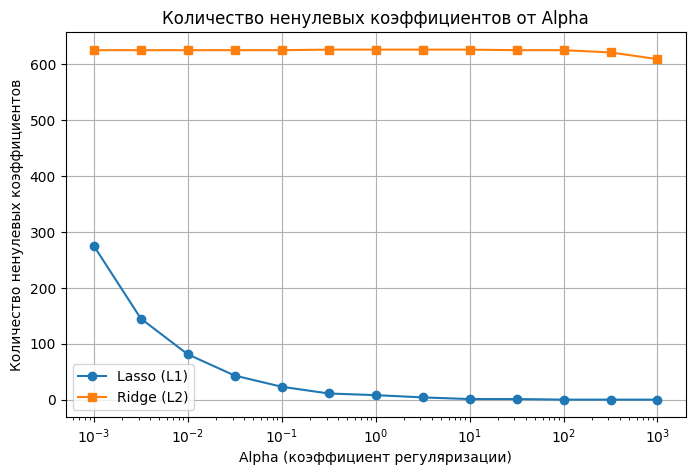

alpha=0.001: Lasso ненулевых=275, Ridge ненулевых=625
alpha=0.003: Lasso ненулевых=145, Ridge ненулевых=625
alpha=0.010: Lasso ненулевых=81, Ridge ненулевых=625
alpha=0.032: Lasso ненулевых=43, Ridge ненулевых=625
alpha=0.100: Lasso ненулевых=23, Ridge ненулевых=625
alpha=0.316: Lasso ненулевых=11, Ridge ненулевых=626
alpha=1.000: Lasso ненулевых=8, Ridge ненулевых=626
alpha=3.162: Lasso ненулевых=4, Ridge ненулевых=626
alpha=10.000: Lasso ненулевых=1, Ridge ненулевых=626
alpha=31.623: Lasso ненулевых=1, Ridge ненулевых=625
alpha=100.000: Lasso ненулевых=0, Ridge ненулевых=625
alpha=316.228: Lasso ненулевых=0, Ridge ненулевых=621
alpha=1000.000: Lasso ненулевых=0, Ridge ненулевых=609


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

# Порог для "близких к 0" коэффициентов
threshold = 1e-3

# Логарифмическая сетка для alpha, чем больше, тем сильнее штраф за большие веса
alphas = np.logspace(-3, 3, 13)

#для неравных 0
lasso_nonzero = []
ridge_nonzero = []

for alpha in alphas:

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    nonzero_lasso = np.sum(np.abs(lasso.coef_) > threshold)
    lasso_nonzero.append(nonzero_lasso)

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    nonzero_ridge = np.sum(np.abs(ridge.coef_) > threshold)
    ridge_nonzero.append(nonzero_ridge)

plt.figure(figsize=(8,5))
plt.plot(alphas, lasso_nonzero, label='Lasso (L1)', marker='o')
plt.plot(alphas, ridge_nonzero, label='Ridge (L2)', marker='s')
plt.xscale('log')
plt.xlabel('Alpha (коэффициент регуляризации)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Количество ненулевых коэффициентов от Alpha')
plt.legend()
plt.grid(True)
plt.show()

for i, alpha in enumerate(alphas):
    print(f"alpha={alpha:.3f}: Lasso ненулевых={lasso_nonzero[i]}, Ridge ненулевых={ridge_nonzero[i]}")

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Предсказания
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Метрики на обучающей выборке
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Метрики на тестовой выборке
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Метрики для обучающей выборки:")
print(f"RMSE: {rmse_train:.3f}")
print(f"MAE: {mae_train:.3f}")
print(f"R²: {r2_train:.3f}")

print("\nМетрики для тестовой выборки:")
print(f"RMSE: {rmse_test:.3f}")
print(f"MAE: {mae_test:.3f}")
print(f"R²: {r2_test:.3f}")

Метрики для обучающей выборки:
RMSE: 8.269
MAE: 5.322
R²: 0.947

Метрики для тестовой выборки:
RMSE: 8.539
MAE: 5.378
R²: 0.945


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Лучшее значение alpha: 10.0


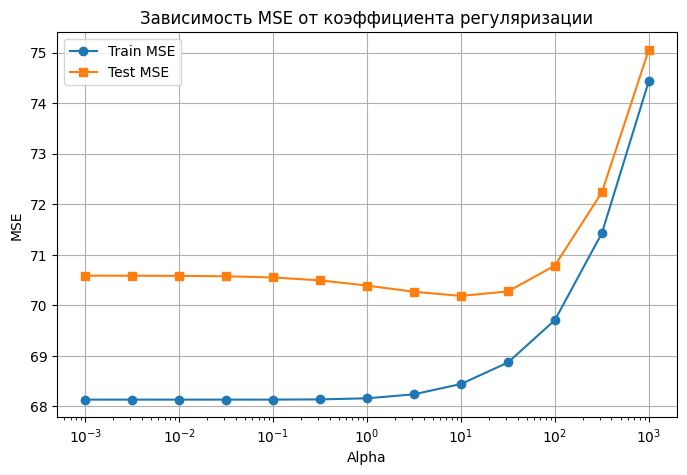

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

alphas = np.logspace(-3, 3, 13)

ridge = Ridge()

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # отрицательный MSE

# Настройка GridSearchCV
param_grid = {'alpha': alphas}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring=mse_scorer, return_train_score=True)
grid.fit(X_train, y_train)

print(f"Лучшее значение alpha: {grid.best_params_['alpha']}")

# MSE для каждого alpha
mean_test_mse = -grid.cv_results_['mean_test_score']  # переворачиваем знак
mean_train_mse = -grid.cv_results_['mean_train_score']

plt.figure(figsize=(8,5))
plt.plot(alphas, mean_train_mse, marker='o', label='Train MSE')
plt.plot(alphas, mean_test_mse, marker='s', label='Test MSE')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Зависимость MSE от коэффициента регуляризации")
plt.legend()
plt.grid(True)
plt.show()



__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Максимальная ошибка: 336.278
Минимальная ошибка: -91.065


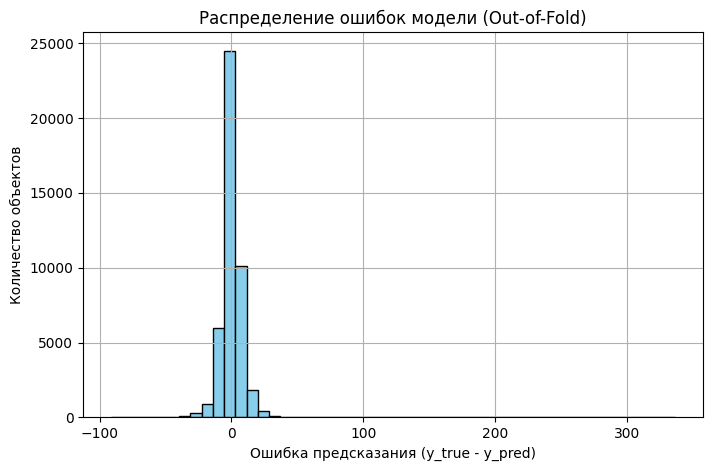

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

ridge = Ridge(alpha=best_alpha)

# Out-of-Fold предсказания на обучающей выборке
y_pred_oof = cross_val_predict(ridge, X_train, y_train, cv=5)

errors = y_train - y_pred_oof

max_error = np.max(errors)
min_error = np.min(errors)
print(f"Максимальная ошибка: {max_error:.3f}")
print(f"Минимальная ошибка: {min_error:.3f}")

plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Ошибка предсказания (y_true - y_pred)")
plt.ylabel("Количество объектов")
plt.title("Распределение ошибок модели (Out-of-Fold)")
plt.grid(True)
plt.show()